<a href="https://colab.research.google.com/github/binacserai/HGC/blob/main/KMEANS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

mounting the drive to collabnotebook


In [ ]:
from google.colab import drive
drive.mount("/content/drive/")

Import necessary libraries:

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


Load the dataset:

In [ ]:
path="/content/drive/MyDrive/Colab Notebooks/GSE20347_Disease.csv"
data=pd.read_csv(path)
data.describe

Checking Null values

In [ ]:
# Check if there are any null values in the entire DataFrame
any_null_values = data.isnull().sum().any()

if any_null_values:
    print("There are null values in the DataFrame.")
else:
    print("There are no null values in the DataFrame.")


# Data Preprocessing
# Assuming 'ID_REF' column contains unique identifiers and is not used for clustering

In [ ]:
data_numeric = data.drop('ID_REF', axis=1)
data_numeric = data_numeric.replace(',', '', regex=True).astype(float)
data_numeric = data_numeric.fillna(data_numeric.mean())


Visualize Clusters (Optional):

# Apply PCA to reduce dimensionality

Explained Variance Ratio:
[0.51116459 0.03558116 0.033795   0.032718   0.03164914 0.03128548
 0.03088751 0.03038966 0.03017559 0.02978902 0.02975781 0.02964107
 0.02935016 0.02906708 0.02903416 0.02806045 0.02765412]


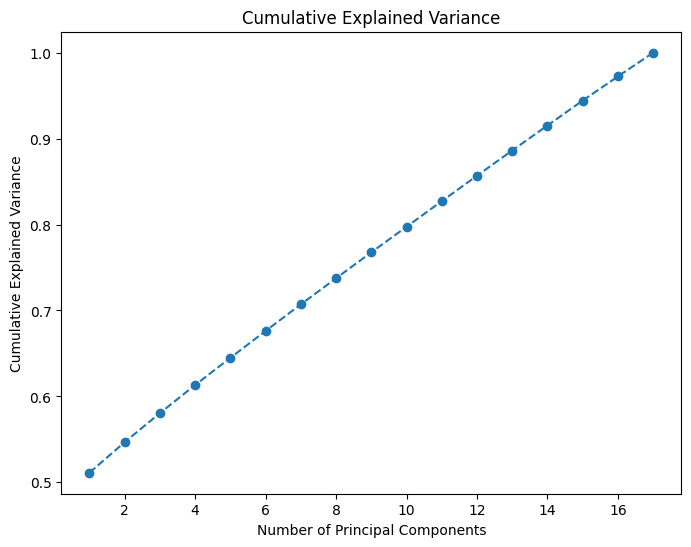

In [ ]:
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming data_numeric is already prepared
# Apply PCA with the desired number of components (e.g., 17)
pca = PCA(n_components=17)
data_pca = pca.fit_transform(data_numeric)

# Create a DataFrame with the principal components
columns_pca = [f'PC{i+1}' for i in range(data_pca.shape[1])]
data_pca_df = pd.DataFrame(data_pca, columns=columns_pca)

# Display the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
print("Explained Variance Ratio:")
print(explained_variance_ratio)

# Plot the cumulative explained variance
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), np.cumsum(explained_variance_ratio), marker='o', linestyle='--')
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()


In [ ]:
# Display the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
print("Explained Variance Ratio:")
print(explained_variance_ratio)

# Identify the most significant component
most_significant_component = np.argmax(explained_variance_ratio) + 1  # Adding 1 to convert from zero-based indexing
print(f"The most significant component is PC{most_significant_component} with explained variance ratio: {explained_variance_ratio[most_significant_component - 1]:.4f}")


Explained Variance Ratio:
[0.51116459 0.03558116 0.033795   0.032718   0.03164914 0.03128548
 0.03088751 0.03038966 0.03017559 0.02978902 0.02975781 0.02964107
 0.02935016 0.02906708 0.02903416 0.02806045 0.02765412]
The most significant component is PC1 with explained variance ratio: 0.5112


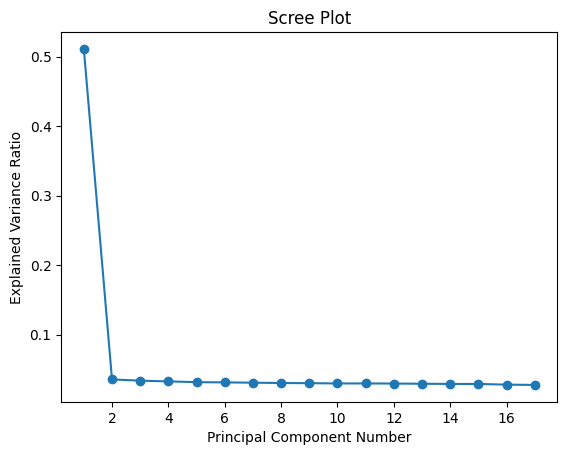

In [ ]:
import matplotlib.pyplot as plt

# Assume explained_variance_ratio contains the explained variance ratio for each PC

# Plot the scree plot
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o')
plt.title('Scree Plot')
plt.xlabel('Principal Component Number')
plt.ylabel('Explained Variance Ratio')
plt.show()


In [ ]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# Assuming data_numeric is already prepared
# Apply PCA with the desired number of components (e.g., 17)
pca = PCA(n_components=17)
data_pca = pca.fit_transform(data_numeric)

# Selecting the first two principal components for clustering
subset_data = data_pca[:, :2]

# Scaling the data (important for K-means)
scaler = StandardScaler()
subset_data_scaled = scaler.fit_transform(subset_data)

# Applying K-means with, for example, 3 clusters
n_clusters = 2  # we can adjust the number of clusters based on our analysis
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
data['Cluster'] = kmeans.fit_predict(subset_data_scaled)

# Calculate Silhouette Score
silhouette_avg = silhouette_score(subset_data_scaled, data['Cluster'])
print("Silhouette Score:", silhouette_avg)

# Displaying the results
print(data['Cluster'].value_counts())

# You can visualize the clusters or further analyze them based on your specific goals


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score: 0.32025488459285373
4     3746
10    3631
9     2694
7     2214
3     2123
0     1752
5     1691
11    1432
2      879
1      769
8      717
6      629
Name: Cluster, dtype: int64


# storing the result in xl files


In [ ]:
# Assuming 'Cluster' column has been added to the 'data' DataFrame
# (as shown in the previous code examples)

# Specify the directory where you want to save the Excel file
output_directory = "/content/drive/MyDrive/Colab Notebooks/Cluster_Results2"

# Create the output directory if it doesn't exist
os.makedirs(output_directory, exist_ok=True)

# Create a Pandas Excel writer using XlsxWriter as the engine
excel_writer = pd.ExcelWriter(os.path.join(output_directory, 'cluster_results.xlsx'), engine='xlsxwriter')

# Iterate through each cluster and write to a separate sheet
for cluster_label in data['Cluster'].unique():
    # Select data for the current cluster
    cluster_data = data[data['Cluster'] == cluster_label]

    # Write the cluster data to a sheet with the cluster label
    cluster_data.to_excel(excel_writer, sheet_name=f'cluster_{cluster_label}', index=False)

excel_writer.save()
excel_writer.close()


NameError: name 'os' is not defined